In [1]:
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from E3PNT.ThreePntEllipse import *
from E2PNT.TwoPointEllipse import *

%load_ext autoreload
%autoreload 2

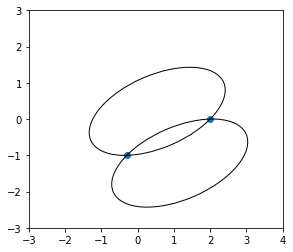

In [5]:
X = [-0.3, 2]
Y = [-1, 0]
a = 2
b = 1

sols = two_point_ellipse(a, b, X[0], Y[0], X[1], Y[1])

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(X, Y)
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 3)



for s in sols:
    xc, yc = s[0].x, s[0].y
    e = patches.Ellipse(xy=[xc, yc], width=2*a, height=2*b, angle=s[1]/pi * 180, fill=False)
    ax.add_artist(e)

plt.show()

[Point(x=-0.9824586505293746, y=0.0), Point(x=0.9824586505293749, y=0.0), Point(x=-0.160541107674113, y=-1.488103340748474)]
3.8608999999999996 4 90.0 1.5707963267948966
3.8608999999999996 4.0
[(Point(x=-1.361335399079456, y=-1.4943551079629311), 0.6553499600746211), (Point(x=-1.3716772646494892, y=-1.1804945032707548), 0.3324508742256598), (Point(x=1.0590819794161062, y=-1.5831647626366792), 2.276819282936569), (Point(x=1.1591705798876926, y=-1.082727276996131), 2.9020776401109254)]
-1.361335399079456, -1.4943551079629311, 0.6553499600746211
2.7 1
-1.3716772646494892, -1.1804945032707548, 0.3324508742256598
2.7 1
1.0590819794161062, -1.5831647626366792, 2.276819282936569
2.7 1
1.1591705798876926, -1.082727276996131, 2.9020776401109254
2.7 1


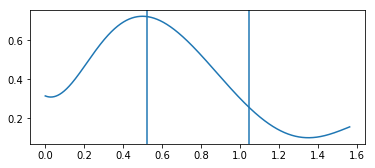

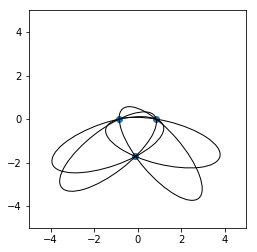

In [4]:
arr = np.linspace(0.0001, pi/2-0.00001, 2000)

a=2.7
b=1

xa = -0.1
ya = -1.72
hh = 0.85


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')


ctx = Context(a, b, -hh, 0, hh, 0, xa, ya)
#ctx.x_mirror()
#ctx.y_mirror()
#ctx.x_mirror()

helper = Helper(ctx)

print(ctx.p)

#tr = get_transitions(ctx)

tu = get_upper_limit(ctx)

print(ctx.d, 4*b*b, tu/pi * 180, tu)
print(ctx.d, 4 * (a**2 * cos(tu)**2 + b**2 * sin(tu)**2))
arr = np.linspace(0.0001, tu-0.01, 2000)

if tu < 1e-9:
    arr = []

ds = [helper.g(t) for t in arr]
plt.plot(arr, ds)
tr = [1/3 * tu, 2/3 * tu]
plt.axvline(x=min(tr[0], tr[1]))
plt.axvline(x=max(tr[0], tr[1]))
#t1 = min(tr[0], tr[1])
#t2 = max(tr[0], tr[1])

#print(helper.g(findMin(helper.g, 0, t1)))
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')


sols = three_point_ellipse(2.7, 1, -hh, 0, hh, 0, xa, ya)
print(sols)

plt.scatter([-hh, hh, xa], [0,0,ya])

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
for s in sols:
    cp, theta = s
    print(f"{cp.x}, {cp.y}, {theta}")
    print(a, b)
    e = patches.Ellipse(xy=[cp.x, cp.y], width=2*a, height=2*b,
                     angle=theta/pi * 180, fill=False)
    ax.add_artist(e)

fig.savefig('4sol.jpg')
    
#plt.show()

#problematica cases
# a=2.7, b=1; h=1.33; (-0.1, -1.82)

# case with 4 solutions
# a=2.7, b=1; h=0.85; (-0.1, -1.72)

-0.41707528275238964 0.0
0.41707528275238964 5.551115123125783e-17
0.26003836655930174 0.00021541504353667085


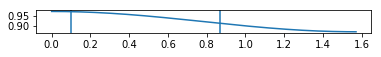

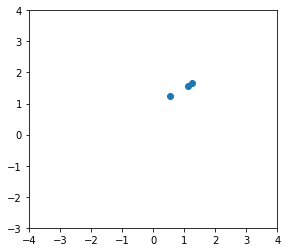

In [4]:
import random

a = 2
b = 0.9
def fp(ax, sols):
    for s in sols:
        cp, theta = s
        #print(f"{cp.x}, {cp.y}, {theta}")
        #print(a, b)
        e = patches.Ellipse(xy=[cp.x, cp.y], width=2*a, height=2*b,
                         angle=theta/pi * 180, fill=False)
        ax.add_artist(e)
    
def pl_f(ax, X, Y):
    #ax.set_ylim(0, 1.2)
    ctx = Context(a, b, X[0], Y[0], X[1], Y[1], X[2], Y[2])
    ctx.x_mirror()
    ctx.y_mirror()
    print(ctx.p[0].x, ctx.p[0].y)
    print(ctx.p[1].x, ctx.p[1].y)
    print(ctx.p[2].x, ctx.p[2].y)

    helper = Helper(ctx)
    tr = get_transitions(ctx)
    tu = get_upper_limit(ctx)
    plt.axvline(x=min(tr[0], tr[1]))
    plt.axvline(x=max(tr[0], tr[1]))
    
    arr = np.linspace(0.0001, tu-0.00001, 2000)
    ds = [helper.g(t) for t in arr]
    ax.plot(arr, ds)

X = [random.random()*3 - 1 for i in range(3)]
Y = [random.random()*3 - 1 for i in range(3)]
    
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
pl_f(ax, X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 4)


plt.scatter(X, Y)

sols = three_point_ellipse(a, b, X[0], Y[0], X[1], Y[1], X[2], Y[2])
fp(ax, sols)